In [3]:
from sklearn import datasets
dataset = datasets.load_digits()
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# First 100 images will be used for testing. This dataset is not sorted by the labels, so it's ok
# to do the split this way.
# Please be careful when you split your data into train and test in general.
test_border = 100
X_train, y_train = dataset.data[test_border:], dataset.target[test_border:]
X_test, y_test = dataset.data[:test_border], dataset.target[:test_border]

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
num_test = X_test.shape[0]

Training data shape:  (1697, 64)
Training labels shape:  (1697,)
Test data shape:  (100, 64)
Test labels shape:  (100,)


In [6]:
# Run some setup code for this notebook.
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

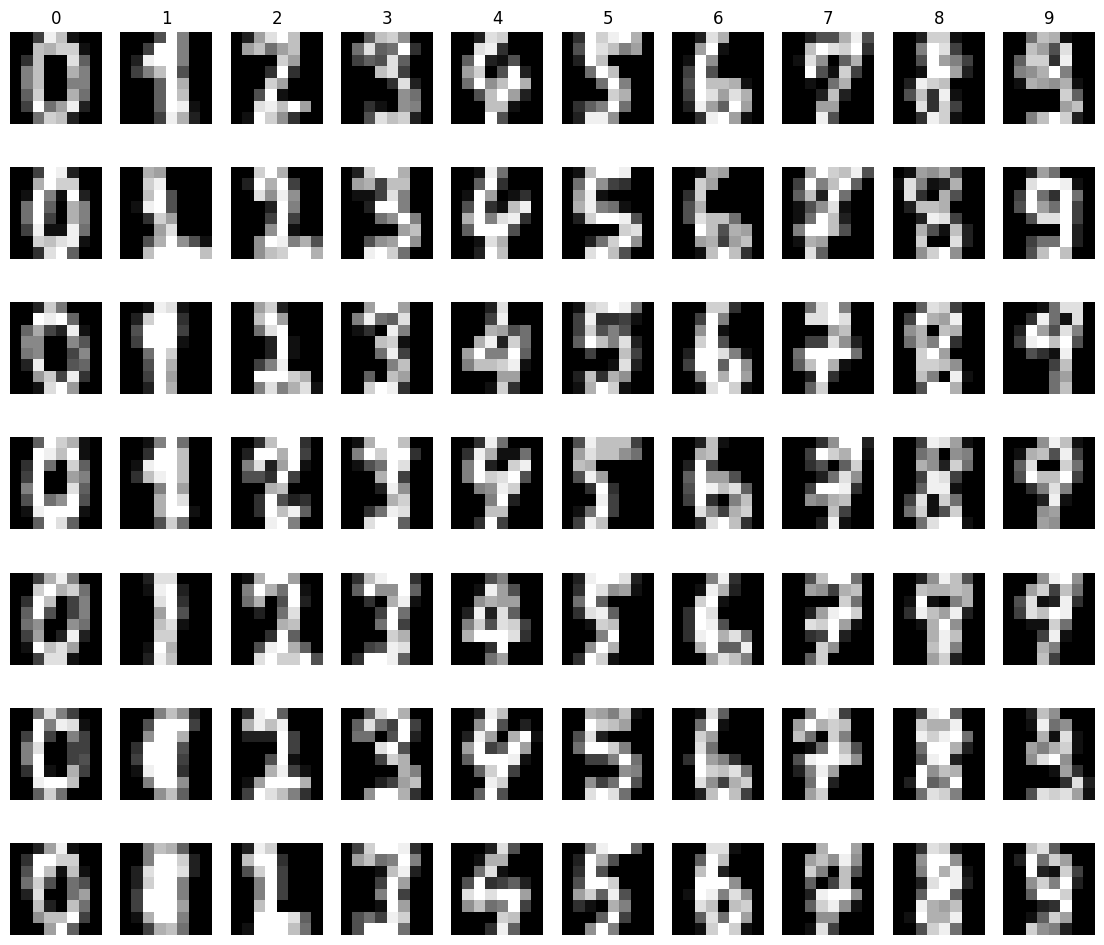

In [7]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(np.arange(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((8, 8)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
# This dirty hack might help if the autoreload has failed for some reason
try:
    del KNearestNeighbor
except:
    pass

from k_nearest_neighbor import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)

ModuleNotFoundError: No module named 'k_nearest_neighbor'

In [9]:
X_train.shape

(1697, 64)

In [10]:
# Open k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

NameError: name 'classifier' is not defined

In [ ]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

In [ ]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = classifier.compute_distances_one_loop(X_test)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('One loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

In [ ]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('No loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

In [11]:
from sklearn import neighbors

In [12]:
implemented_knn = KNearestNeighbor()
implemented_knn.fit(X_train, y_train)

NameError: name 'KNearestNeighbor' is not defined

In [13]:
n_neighbors = 1
external_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
external_knn.fit(X_train, y_train)
print('sklearn kNN (k=1) implementation achieves: {} accuracy on the test set'.format(
    external_knn.score(X_test, y_test)
))
y_predicted = implemented_knn.predict(X_test, k=n_neighbors).astype(int)
accuracy_score = sum((y_predicted==y_test).astype(float)) / num_test
print('Handcrafted kNN (k=1) implementation achieves: {} accuracy on the test set'.format(accuracy_score))
assert np.array_equal(
    external_knn.predict(X_test),
    y_predicted
), 'Labels predicted by handcrafted and sklearn kNN implementations are different!'
print('\nsklearn and handcrafted kNN implementations provide same predictions')
print('_'*76)


n_neighbors = 5
external_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
external_knn.fit(X_train, y_train)
print('sklearn kNN (k=5) implementation achieves: {} accuracy on the test set'.format(
    external_knn.score(X_test, y_test)
))
y_predicted = implemented_knn.predict(X_test, k=n_neighbors).astype(int)
accuracy_score = sum((y_predicted==y_test).astype(float)) / num_test
print('Handcrafted kNN (k=5) implementation achieves: {} accuracy on the test set'.format(accuracy_score))
assert np.array_equal(
    external_knn.predict(X_test),
    y_predicted
), 'Labels predicted by handcrafted and sklearn kNN implementations are different!'
print('\nsklearn and handcrafted kNN implementations provide same predictions')
print('_'*76)

sklearn kNN (k=1) implementation achieves: 0.95 accuracy on the test set


NameError: name 'implemented_knn' is not defined

In [ ]:
X_train_big = np.vstack([X_train]*5)
X_test_big = np.vstack([X_test]*5)
y_train_big = np.hstack([y_train]*5)
y_test_big = np.hstack([y_test]*5)

In [ ]:
classifier_big = KNearestNeighbor()
classifier_big.fit(X_train_big, y_train_big)
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier_big.compute_distances_two_loops, X_test_big)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier_big.compute_distances_one_loop, X_test_big)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier_big.compute_distances_no_loops, X_test_big)
print('No loop version took %f seconds' % no_loop_time)

# You should see significantly faster performance with the fully vectorized implementation!

# NOTE: depending on what machine you're using, 
# you might not see a speedup when you go from two loops to one loop, 
# and might even see a slow-down.